In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import Planck
from scipy.constants import elementary_charge
h = Planck
e = elementary_charge

In [41]:
file_path = 'current.csv'
data = pd.read_csv(file_path)
R_f = 1e5

In [42]:
data = data*1e-2
data

I
0    -0.06
1    -0.06
2     0.00
3     0.00
4     0.01
...    ...
3995  0.04
3996  0.03
3997  0.03
3998  0.00
3999 -0.03

[4000 rows x 1 columns]

In [43]:
n = data.size
n

4000

In [44]:
initial = 0
final = n
time = np.arange(0,n)
time = time*1e-5
time = time[initial:final]
time

array([0.000e+00, 1.000e-05, 2.000e-05, ..., 3.997e-02, 3.998e-02,
       3.999e-02])

In [45]:
data_new = data[initial:final]
data_new = data_new/R_f
data_new

I
0    -6.000000e-07
1    -6.000000e-07
2     0.000000e+00
3     0.000000e+00
4     1.000000e-07
...            ...
3995  4.000000e-07
3996  3.000000e-07
3997  3.000000e-07
3998  0.000000e+00
3999 -3.000000e-07

[4000 rows x 1 columns]

In [46]:
current = data_new

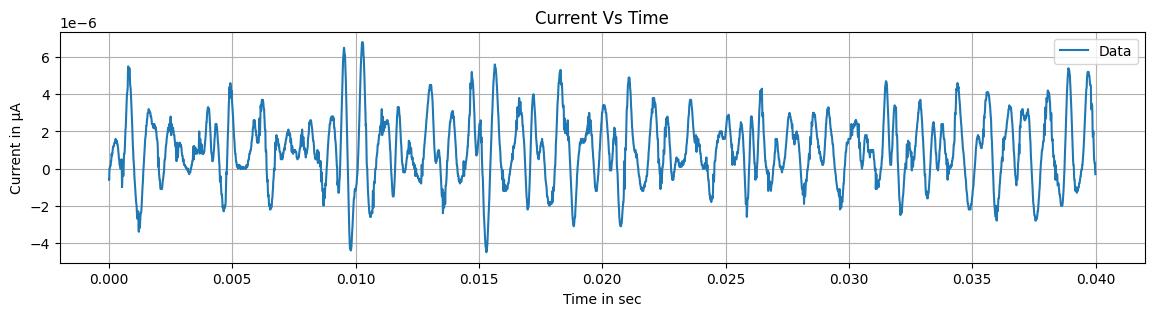

In [47]:
plt.figure(figsize=(14,3))
plt.plot(time, current, marker='', label='Data')
plt.title('Current Vs Time')
plt.xlabel('Time in sec')
plt.ylabel('Current in \u00B5A')
plt.legend()
plt.grid(True)
plt.savefig('Current graph.png')
plt.show()


In [48]:
ste = e*e/h
ste = ste*2
ste

7.748091729863649e-05

In [49]:
v = 0.0133
conductance = current/v
steps = ste
conductance = conductance/steps

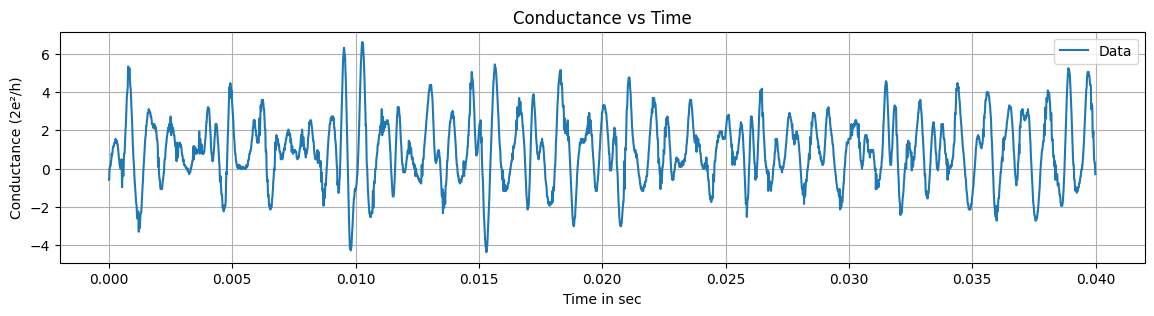

In [50]:
plt.figure(figsize=(14,3))
plt.plot(time, conductance, marker='', label='Data')
plt.title('Conductance vs Time')
plt.xlabel('Time in sec')
plt.ylabel('Conductance (2e\u00b2/h)')
plt.legend()
plt.grid(True)
plt.savefig('conductance_graph.png')
plt.show()


In [51]:
fft_result = np.fft.fft(data_new)
frequencies = np.fft.fftfreq(len(data_new))

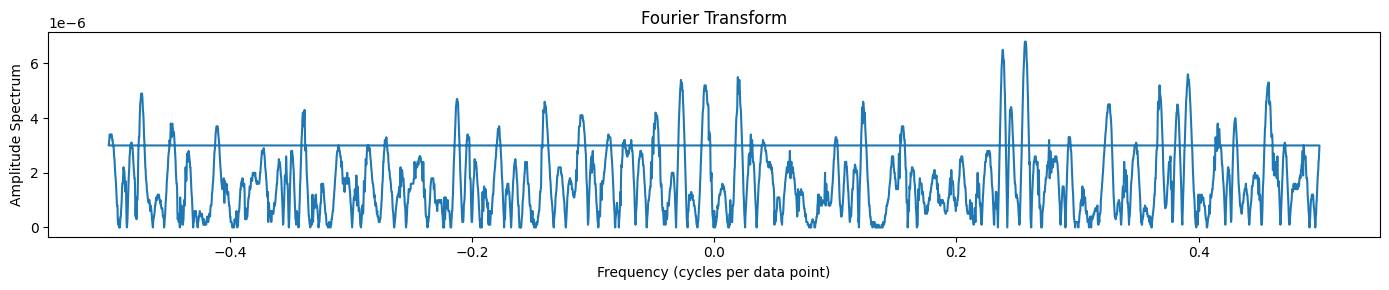

In [52]:
plt.figure(figsize=(14, 3))

plt.plot(frequencies, np.abs(fft_result), marker='')
plt.title('Fourier Transform')
plt.xlabel('Frequency (cycles per data point)')
plt.ylabel('Amplitude Spectrum')

plt.tight_layout()
plt.savefig('Frequency_graph.png')
plt.show()
